# Prática Independente - Scikit Learn.

### Vamos usar o `dataset` `"penguins.csv"` em anexo para estudar algumas características desses animais.

#### o dataset consiste de 7 colunas.

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin sex

### O que são comprimento e profundidade de culmen?

#### O culmen é "o cume superior do bico de um pássaro"

### O que são "flippers"?

#### As asas dos pinguins são chamadas de nadadeiras. São planas, finas e largas, com uma forma longa e cônica e uma ponta arredondada e sem corte

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

#Tamanho padrão das figuras neste notebook
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 100

#### Exercício 1: Carregue o dataset `penguins.csv` em um `dataframe`, estude seus atributos e calcule uma matriz de correlação entre os mesmos. Plot a relação `'culmen_length_mm'` `'body_mass_g'` separando a dispersão pelas espécies. Por fim, apresente o `pairplot` de todos os atributos.

In [3]:
df = pd.read_csv('penguins.csv')
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,NaN,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


Temos dois dados faltando em nossas variáveis quantitativas contínuas. Como isso representa uma porcentagem pequena dos dados, vamos optar por retirá-los.

In [5]:
novo_df = df.dropna(subset= ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 18.7+ KB


Vamos examinar as correlações entre as variáveis quantitativas contínuas que temos, isto é: culmen_length (tamanho do culmen), culmen_depth (profundidade do culmen), flipper_length (tamanho das asas do pinguin) e body_mass (massa corporal)

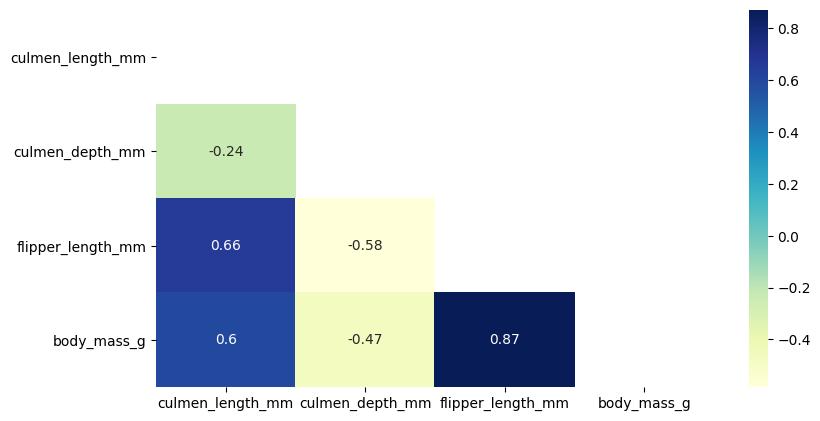

In [6]:
# Correlações das variáveis supracitadas
correlacoes = novo_df[['culmen_length_mm',	'culmen_depth_mm',	'flipper_length_mm',	'body_mass_g']].corr()

# Criando máscara para retirar as correlações das variáveis com elas mesmas == 1.
mascara = np.zeros_like(correlacoes)
mascara[np.triu_indices_from(mascara)] = True

#Matriz de correlação das variáveis quantiativas contínuas do dataset
sns.heatmap(correlacoes, annot= True, mask= mascara, cmap="YlGnBu");

Temos grande correlação positiva entre o tamanho das asas do pinguin e seu peso (cerca de 87%). Ou seja, quando o tamanho da asas do pinguin é maior, o seu peso também o é. 

O tamanho da parte superior do bico do pinguin também possui correlação positiva com sua massa corporal, apesar de ser menor (cerca de 60%), claro, que o tamanho das asas.

Vamos agora plotar a relação 'culmen_length_mm' e 'body_mass_g' separando a dispersão pelas espécies:

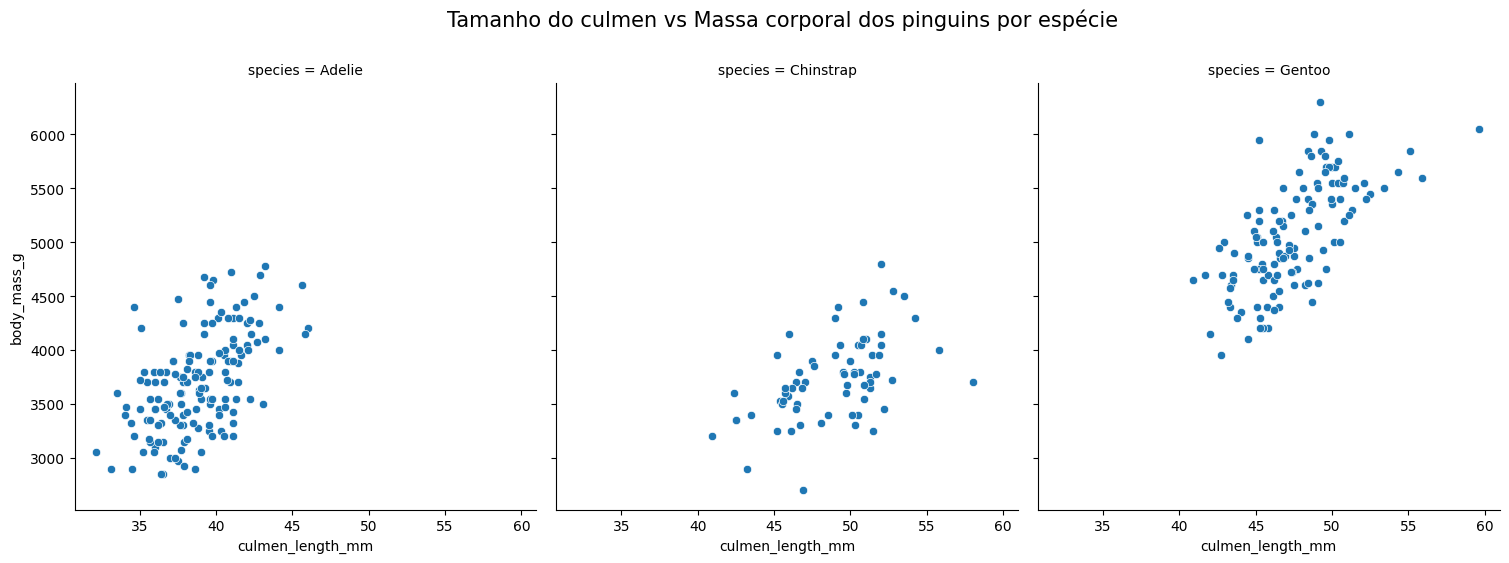

In [7]:
sns.relplot(
    data=novo_df, x='culmen_length_mm', y='body_mass_g',
    col='species',
    kind='scatter'
)

plt.text(s= 'Tamanho do culmen vs Massa corporal dos pinguins por espécie', y= 7000, x= -8, fontsize= 15);

Parece que de fato todas as espécies demonstram correlação positiva entre os dois atributos, porém a espécie Gentoo parece que essa relação é mais forte.

Isso nos leva a levantar a indagação da correlação de tamanho do culmen e massa corporal: na gentoo essa relação é de culmen maiores e pesos maiores; na chinstrap, apesar de indivíduos com culmen também grandes, a massa corporal já não demonstra o mesmo comportamento que nos indivíduos gentoos. Isso poderia nos indicar que há alguma característica singular da espécie chinstrap que faria sua massa corporal ser menor mesmo com tamanhos de culmens similares a gentoo.

Vamos olhar o valor de correlação dos dois atributos por espécie e ver se esta hipótese da correlação diferente entre os dois atributos por espécie é confirmada:

In [8]:
especies = ['Adelie', 'Chinstrap', 'Gentoo']

#Valor de correlação de Tamanho do Culmen e Massa corporal por espécie
print('Correlação Tamanho do Culmen vs Massa corporal por espécie:')
print()
for especie in especies:
  dados_especie = novo_df[novo_df['species']== especie]
  corr = dados_especie[['culmen_length_mm', 'body_mass_g']].corr()
  print(f'{especie}: {corr["body_mass_g"][0]:.2}')

Correlação Tamanho do Culmen vs Massa corporal por espécie:

Adelie: 0.55
Chinstrap: 0.51
Gentoo: 0.67


Podemos ver acima que de fato a espécie Gentoo possui uma correlação positiva mais acentuada entre o tamanho do culmen e a massa corporal dos pinguins. A espécie Chinstrap, por sua vez, é a que menos correlação possui.

Vamos agora examinar o pairplot de todos os atributos:

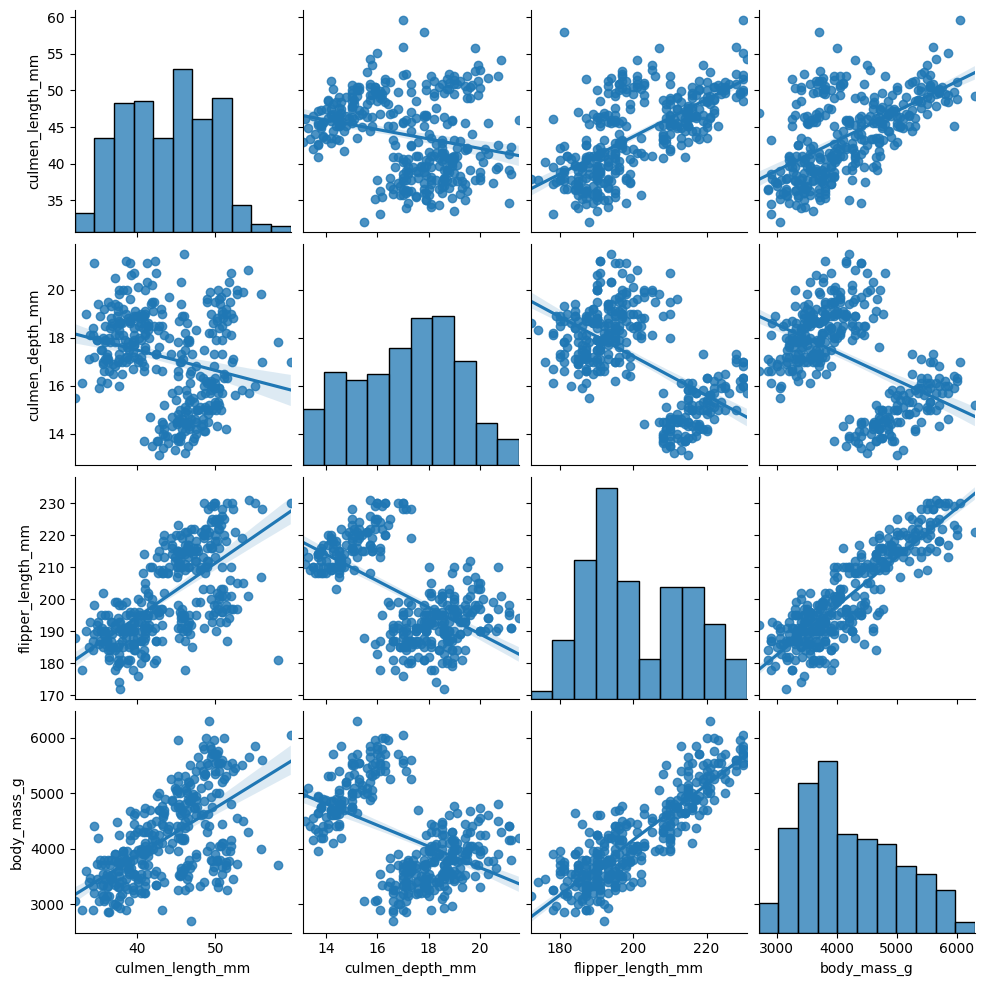

In [9]:
sns.pairplot(novo_df, kind= 'reg');

#### Exerício 2: Aproveitando-se do modelo `Naive-Bayes`,  faça uso do modelo [`sklearn.naive_bayes.GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) para predizer a espécie dos penguins. Realize todos os processos, passo a passo, da escolha do modelo e seu estanciamento, até os ajustes e a previsão. Como sugestão de simplificação você pode eliminar a coluna `'sex'`.  Ao final, faça o teste de acurácia de seu modelo.

Uma das necessidades do modelo indicado é a distribuição normal (ou próxima a ela) dos atributos (tamanho e profundidade da parte superior dos bico, tamanho da asa e massa corporal) para cada classe que se deseja predizer. Nesse sentido, é importante olharmos a kurtosis e a distorção da distribuição de casa atributo para confirmarmos se seguem essas premissas.

In [11]:
# Retirando coluna do gênero dos pinguins
df_predicao = novo_df.drop(columns= ['sex'])

In [12]:
from scipy.stats import kurtosis
from scipy.stats import skew

atributos = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for atributo in atributos:
  print(f'{atributo}:')
  k = kurtosis(df_predicao[atributo], fisher= False)
  s = skew(df_predicao[atributo])
  print(f'Nível de outliers:{k:.2}')
  print(f'Nível de distorção: {s:.2}')
  print()

culmen_length_mm:
Nível de outliers:2.1
Nível de distorção: 0.053

culmen_depth_mm:
Nível de outliers:2.1
Nível de distorção: -0.14

flipper_length_mm:
Nível de outliers:2.0
Nível de distorção: 0.34

body_mass_g:
Nível de outliers:2.3
Nível de distorção: 0.47



Como o nível de outliers não estão muito longe de 3 e o nível de distorção das distribuições são próximas a zero, podemos dizer que temos as premissas necessárias para utilizar os atributos no modelo. 

Porém, não podemos afirmar a partir das medidas que temos distribuições normais, mas que são próximas de distribuições normais.

In [13]:
#Variáveis independentes
X_pinguin = df_predicao.drop('species', axis = 1)
X_pinguin.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [14]:
# Variável dependente (target)
y_pinguin = df_predicao['species']
y_pinguin.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [15]:
#Separando dataset em dados de treino e de teste
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pinguin, y_pinguin, random_state = 1)

#Instanciando o modelo
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()

# Treinando o modelo
modelo.fit(Xtrain, ytrain)

#Espécies preditas pelo modelo
y_modelo = modelo.predict(Xtest)

In [16]:
#Medindo a acurácia do modelo em porcentagem, isto é, de todos os indivíduos, quantos porcentos o modelo fez a predição correta?
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(ytest, y_modelo)

print(f'O modelo possui uma acurácia de aproximadamente {acuracia:.2}')

O modelo possui uma acurácia de aproximadamente 0.98


#### Exercício 3: Aplique o método de  [Principal Component Analysis](https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51), com o auxílio do modelo [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para realizar a redução de dimensionalidade do dataset penguins. Siga todos os passos, da seleção e instanciamento do modelo aos ajustes e transformação. Plote as componentes principais como reflexo das espécies dos pinguins.

In [17]:
#Instanciando o modelo
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2) # n_components == número de dimensões a que vamos reduzir nossos atributos (temos 4)

Aqui não utilizamos o y_teste, pois não estamos trabalhando com aprendizado supervisionado onde possuímos a variável dependente que queremos prever.
Nesse caso estamos passando 4 dimensões ao modelo com variáveis quantitativas contínuas e o "pedindo" para retornar 2 dimensões (variáveis) contínuas que melhor "descrevem" as 4 passadas a priori.

In [18]:
#Treinando o modelo
modelo_pca.fit(X_pinguin)

# Transformando os dados em duas dimensões com a função .transform(). 
# Podemos criar um objeto (variável) que receba a transformação dos dados de teste.
X_2D = modelo_pca.transform(X_pinguin)

# Inserindo os valores gerados das duas dimensões nos indivíduos do dataset original
df_predicao['PCA1'] = X_2D[:, 0]
df_predicao['PCA2'] = X_2D[:, 1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


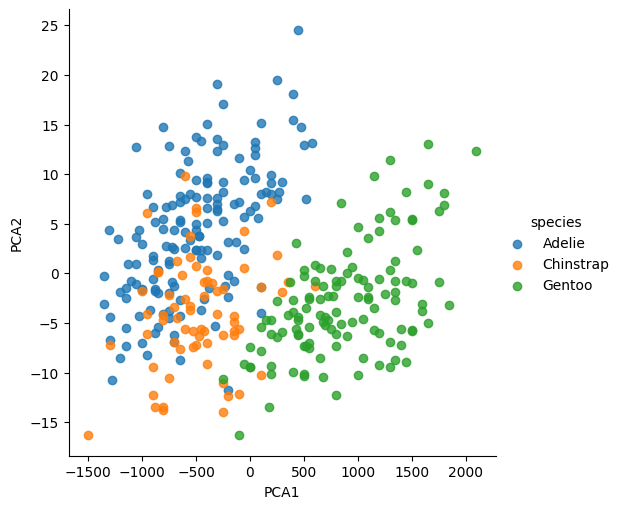

In [19]:
#Plotando as variáveis PCA1 e PCA2 de acordo com os indivíduos correspondentes no df_predicao
sns.lmplot("PCA1", 
           "PCA2", 
           hue = 'species', 
           data = df_predicao, 
           fit_reg = False
          );

Podemos perceber que a espécie Gentoo se destaca mais e difere mais das outras duas espécies nas duas dimensões geradas. Estas, por sua vez, possuem menor singularidade uma em relação a outra nas duas dimensões geradas. Isto pode ter relação com as hipóteses levantadas no exercício 1 quando examinamos a correlação de tamanho do culmen vs massa corporal por espécie.

#### Exercício 4: Considerando a clusterização, observe o método [Gaussian Mixture Model](https://scikit-learn.org/stable/modules/mixture.html#:~:text=sklearn.,of%20components%20are%20also%20provided.) e, tirando vantagem do modelo do modelo [`sklearn.mixture.GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), faça a separação das espécies dos pinguins.

O algoritmo Gaussian Mixture Model é um algoritmo de clustering. Esses algoritmos podem ser definidos como algoritmos de aprendizagem não supervisionada que tentam encontrar grupos diferentes nos dados sem fazer referência a variável dependente (target). Por isso, não estamos tentando prever alguma classe ou valor, mas agrupar os dados de acordo com características similares dos seus indíviduos encontradas pelos modelo.

n_components = o número de grupos que o modelo irá gerar . Aqui sabemos que temos 3 espécies de pinguins, mas em dados diferentes existem outras maneiras para determinar a quantidade de grupos, inclusive medindo a acurácia do modelo com quantidade de grupos diferentes.

In [40]:
# Instanciando modelo
from sklearn.mixture import GaussianMixture
modelo_gaussian_mixture = GaussianMixture(n_components = 3, covariance_type = 'full')

#Treinando/apresentando os dados ao modelo
modelo_gaussian_mixture.fit(X_pinguin)

#Predições do modelo do pertencimento dos indivíduos a qual dos 3 grupos
y_gmm = modelo_gaussian_mixture.predict(X_pinguin)

#Primeiras cinco predições
y_gmm[:5]

array([1, 1, 1, 1, 1])

In [41]:
#Adicionaremos as tags dos grupos ao DataFrame novo_df (com dois indivíduos excluídos do dataframe original) 
#e usar o Seaborn para traçar os resultados:
df_predicao['grupo'] = y_gmm
df_predicao.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,PCA1,PCA2,grupo
0,Adelie,39.1,18.7,181.0,3750.0,-452.023209,13.336636,1
1,Adelie,39.5,17.4,186.0,3800.0,-401.949980,9.152694,1
2,Adelie,40.3,18.0,195.0,3250.0,-951.740904,-8.261476,1
4,Adelie,36.7,19.3,193.0,3450.0,-751.812661,-1.975922,1
5,Adelie,39.3,20.6,190.0,3650.0,-551.874575,3.343783,1


Agora, vamos traçar os resultados. Inserimos os resultados no DataFrame de predição (df_predicao) e usamos o método .lmplot() de Seaborn para mostrar os resultados. Vamos novamente plotar os resultados da aproximação Principal Component Analysis, mas agora adotando o parâmetro col = 'grupo' para examinar a separação dos pinguins feita pelo modelo Gaussian Mixture.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


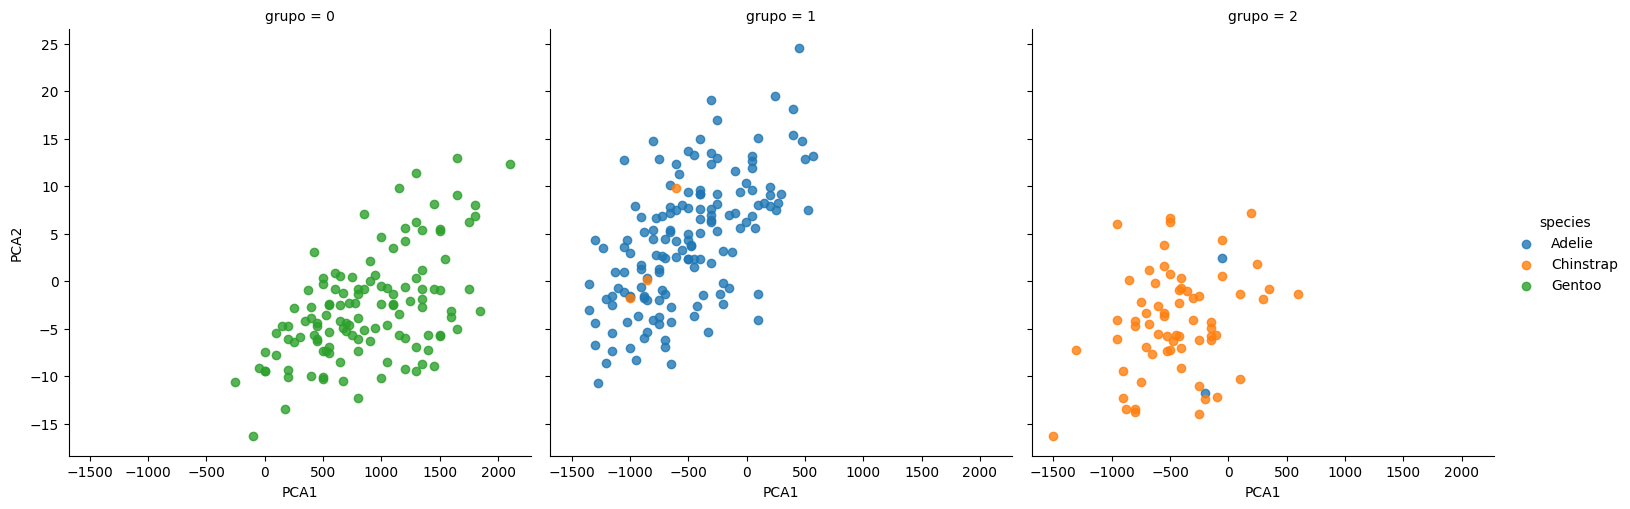

In [38]:
sns.lmplot("PCA1", 
           "PCA2", 
           data = df_predicao, 
           hue = 'species', 
           col = 'grupo', 
           fit_reg = False
          );

Mais uma vez vemos que há mistura (menor nesse modelo, é verdade) entre pinguins da espécie Adelie e Chinstrap; e o Gentoo bem separado e singular em relação a essas duas espécies.